# Pre-Processing

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# load the dataset into a Pandas dataframe
df = pd.read_csv("./Data/BankChurners.csv")

## Data exploration

In [3]:
df.shape

(10127, 23)

In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
# last two columns not needed
df = df.iloc[:, :-2]

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
# check attrited customers
df['Attrition_Flag'].value_counts() 

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [10]:
# gender
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [11]:
# education level
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [12]:
# marital Status
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [13]:
# card category
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

## Data Cleaning & Feature Engineering

In [14]:
# check missing values
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### Encoding categorical features

In [15]:
# save the original data
df_original = df.copy()

In [16]:
cols = df.iloc[:, 2:].select_dtypes(['int64', 'float64']).columns
cols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [17]:
# make binary categorical variables 0 and 1 
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [18]:
# check multivariate outliers and remove them: calculate Mahalanobis distance for each data point
data_mean = df[cols].mean(axis=0)
data_cov = df[cols].cov()
inv_covmat = np.linalg.inv(data_cov)
dists = []
for i in range(len(df[cols])):
    dist = np.sqrt((df[cols].iloc[i] - data_mean).dot(inv_covmat).dot((df[cols].iloc[i] - data_mean).T))
    dists.append(dist)

# set a threshold for the Mahalanobis distance above which points will be considered outliers
threshold = np.mean(dists) * 3

# identify and remove outliers from the dataset
outliers = np.where(dists > threshold)[0]
outliers

array([  1,   8,  12, 113, 269, 773], dtype=int64)

In [19]:
df = df.drop(df.index[outliers])

In [20]:
df.shape

(10121, 21)

# Customer Segmentation using Clustering (K-means)

In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set_theme()

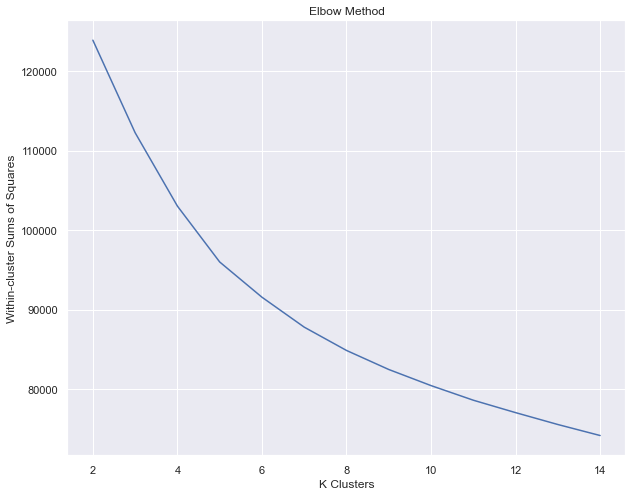

In [24]:
# elbow method to find the optimal number of clusters
a = []
data = StandardScaler().fit_transform(df[cols])

for i in range(2,15):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 1)
    km.fit(data)
    a.append(km.inertia_)

fig = plt.figure(figsize=(10,8))
plt.plot(range(2,15), a)
plt.title('Elbow Method')
plt.xlabel('K Clusters')
plt.ylabel('Within-cluster Sums of Squares')
plt.show()

It's hard to choose the optimal cluster as the plot does not show a clear flattening pattern. As the data size is not large, we can use Silhouette score to check the ideal cluster.

In [25]:
# get silhouette score for k= 2,3,4,5,6,7,8,9,10
for i in range(2,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 50, random_state = 1)
    km.fit(data)
    print('Silhouette Score for k =', i, 'is', silhouette_score(data, km.labels_))

Silhouette Score for k = 2 is 0.17786226136884747
Silhouette Score for k = 3 is 0.1170994354872105
Silhouette Score for k = 4 is 0.13298411153773096
Silhouette Score for k = 5 is 0.12680662979052873
Silhouette Score for k = 6 is 0.12018343220324086
Silhouette Score for k = 7 is 0.1209876362418691
Silhouette Score for k = 8 is 0.11201084896585595
Silhouette Score for k = 9 is 0.11148921931736522
Silhouette Score for k = 10 is 0.10228520313451382


A guideline for using average silhouette score:

≥ 0.5 - good evidence of the reality of the clusters in the data,
0.25 – 0.5 - some evidence of the reality of the clusters in the data,
< 0.25 - scant evidence of cluster reality.

As per the guideline above, the highest Silhouette Score of 0.1778 for k = 2 is not recommended to use (curse of dimensionality). We will do Feature Engineering using PCA to see whether Silhouette Score increases.

### Feature Engineering using PCA to find optimal cluster value

In [26]:
pca = PCA(n_components=2, random_state=1)
pca.fit(data)
df_transformed = pca.transform(data)

print('PCA Component 1 Ratio of Explained Variance')
print(round(pca.explained_variance_ratio_[0], 3))
print()
print('PCA Component 2 Ratio of Explained Variance')
print(round(pca.explained_variance_ratio_[1], 3))

PCA Component 1 Ratio of Explained Variance
0.183

PCA Component 2 Ratio of Explained Variance
0.147


The 2 components from PCA explain about 33% of the variance. Now, we will add the cluster labels to see how well the clusters are defined.

In [27]:
# get silhouette score for k= 2,3,4,5,6,7,8
for i in range(2,9):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 50, random_state = 1)
    km.fit(df_transformed)
    print('Silhouette Score for k =', i, 'is', silhouette_score(df_transformed, km.labels_))

Silhouette Score for k = 2 is 0.4111924807378641
Silhouette Score for k = 3 is 0.35844918772350676
Silhouette Score for k = 4 is 0.37229865531716816
Silhouette Score for k = 5 is 0.3745341871837515
Silhouette Score for k = 6 is 0.3830649826716211
Silhouette Score for k = 7 is 0.38138239358700976
Silhouette Score for k = 8 is 0.3584408804383104


We can see that the Silhouette score has increased after PCA and is within healthy range: 0.25 – 0.5 - some evidence of the reality of the clusters in the data. For the purpose of this analysis, the stakeholders require us to segment customers by at least 4 or more. Thus, we will proceed with k = 6, which has the second highest Silhouette Score.

In [48]:
# finalize the decision with pca = 2 and k = 6
preprocessor = Pipeline(
    [
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2, random_state=1))
    ]
)

clusterer = Pipeline(
    [
        (
        "kmeans",
        KMeans(
            n_clusters=6,
            init="k-means++",
            n_init=50,
            max_iter=1000,
            random_state=1
            )
        )
    ]
)

pipe = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("clusterer", clusterer)
        ]
)

In [49]:
pipe.fit(df[cols])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=1))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=1000, n_clusters=6, n_init=50,
                                         random_state=1))]))])

In [50]:
# check the final silhouette score
preprocessed_data = pipe["preprocessor"].transform(df[cols])
predicted_labels = pipe["clusterer"]["kmeans"].labels_
print('Silhouette Score: ', round(silhouette_score(preprocessed_data, predicted_labels), 3))

Silhouette Score:  0.383


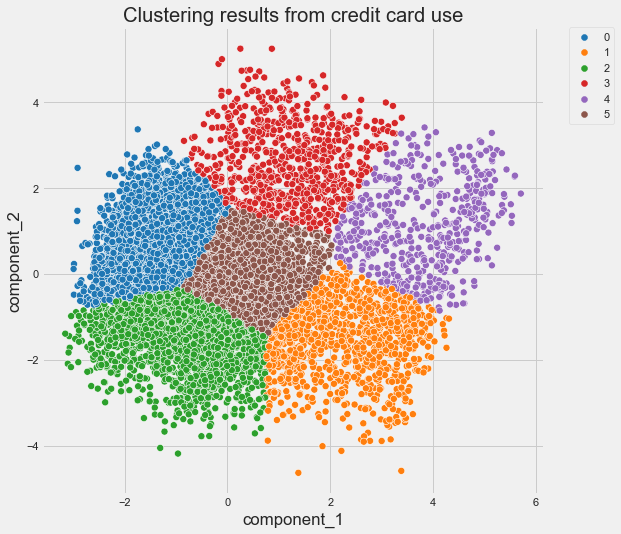

In [51]:
# visualize the clusters
pcadf = pd.DataFrame(
        pipe["preprocessor"].transform(df[cols]),
        columns=["component_1", "component_2"]
    )
   
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
   
sp = sns.scatterplot(
        x="component_1",
        y="component_2",
        s=50,
        data=pcadf,
        hue="predicted_cluster",
        palette='tab10'
    )
   
sp.set_title(
        "Clustering results from credit card use"
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
   
plt.show()

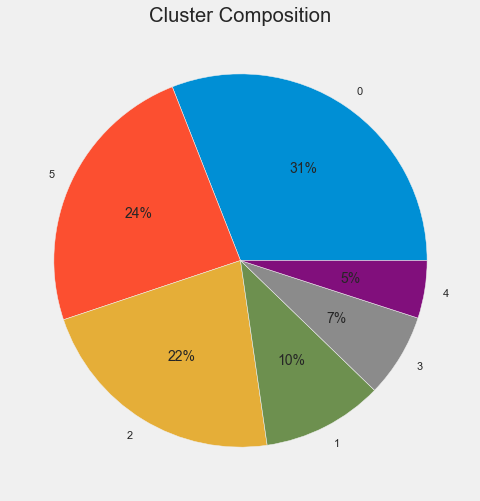

In [52]:
# check the composition of each cluster
df['cluster'] = pipe['clusterer']['kmeans'].labels_
fig, axs = plt.subplots(figsize=(12,8))
ax = df['cluster'].value_counts().plot.pie(title='Cluster Composition', autopct='%1.0f%%')
plt.title=False
ax.set_ylabel('')
plt.show()

cluster  Attrition_Flag
0        0                 2925
         1                  208
1        0                  832
         1                  228
2        0                 1379
         1                  862
3        0                  705
         1                   29
4        0                  457
         1                   48
5        0                 2196
         1                  252
Name: CLIENTNUM, dtype: int64

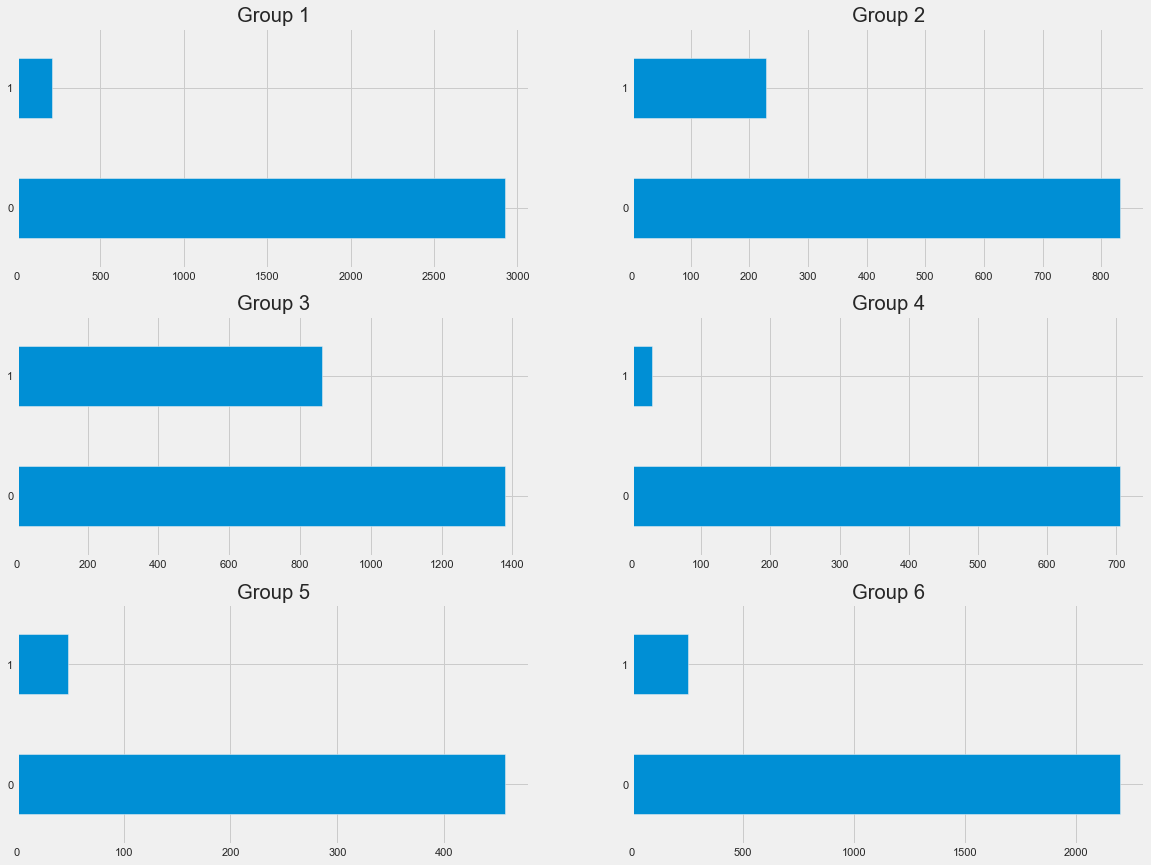

In [53]:
# examine differences between clusters
fig, axs = plt.subplots(ncols=2,nrows=3, figsize=(18,14))
df[df['cluster'] == 0]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[0,0], title='Group 1')
df[df['cluster'] == 1]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[0,1], title='Group 2')
df[df['cluster'] == 2]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[1,0], title='Group 3')
df[df['cluster'] == 3]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[1,1], title='Group 4')
df[df['cluster'] == 4]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[2,0], title='Group 5')
df[df['cluster'] == 5]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[2,1], title='Group 6')

# get the number of customers for Attrition_Flag = 0 and 1 for each cluster
df.groupby(['cluster', 'Attrition_Flag'])['CLIENTNUM'].count()

We can observe that group 3 have higher rate of customer attrition compared to other groups.

<AxesSubplot:title={'center':'Group 6'}>

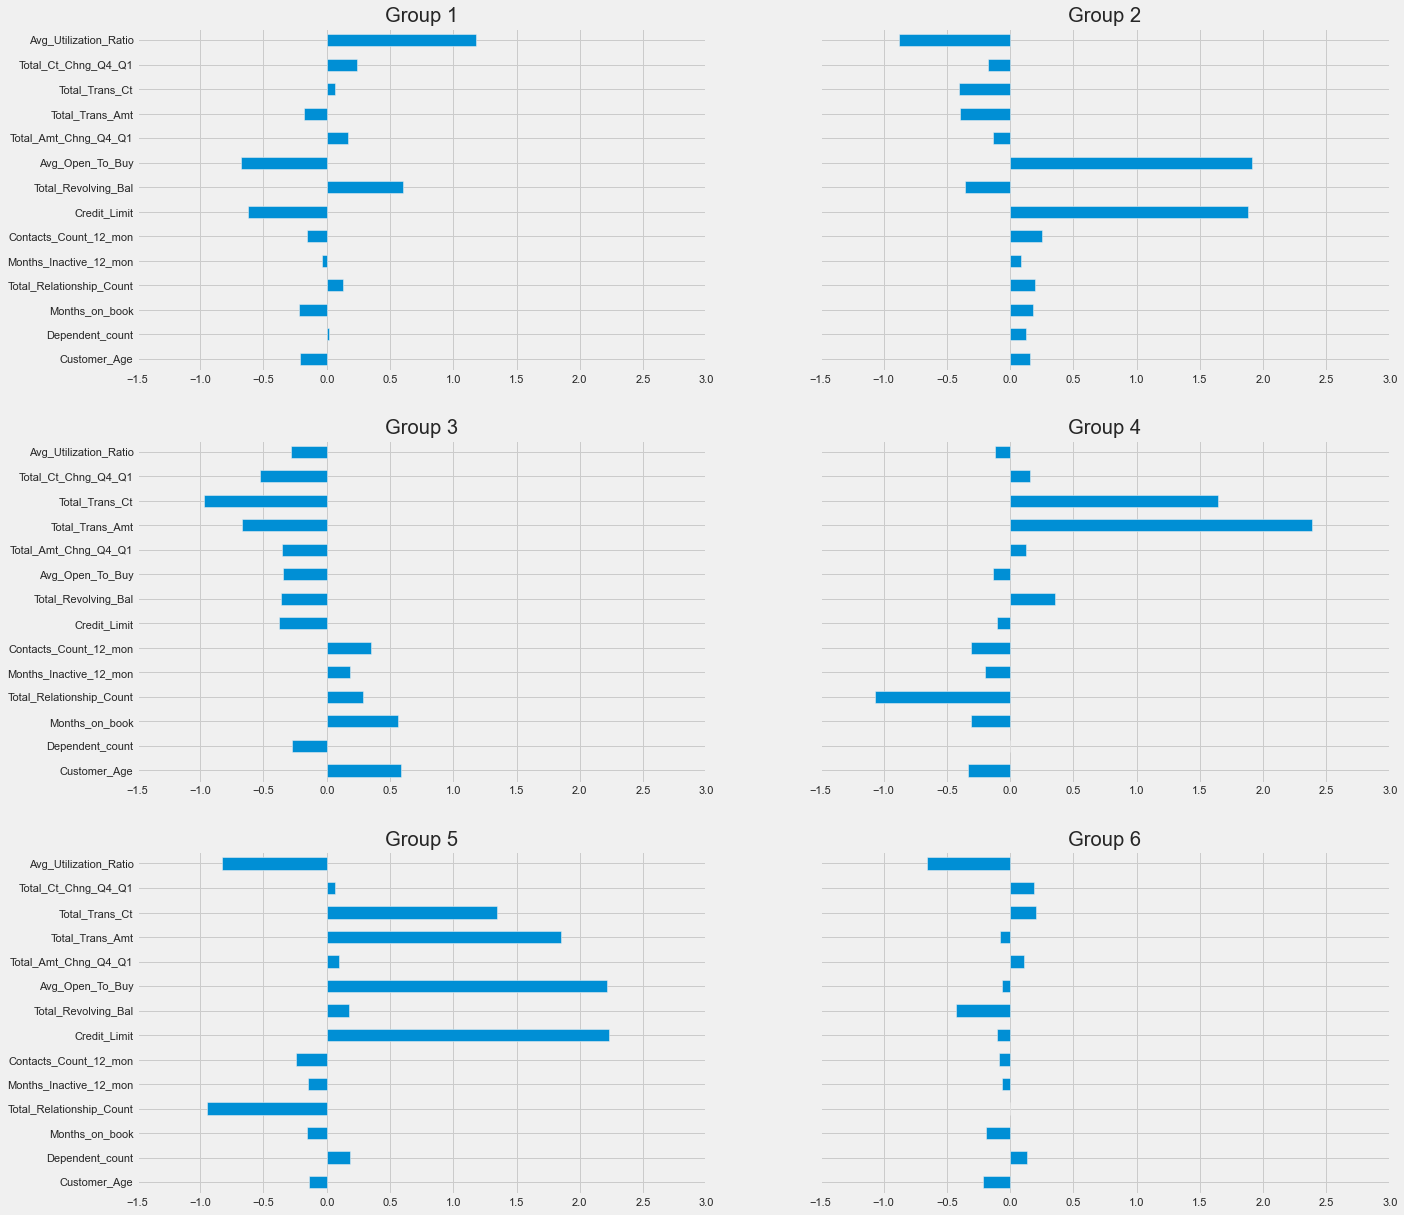

In [54]:
# checking each groups's account activity behaviors
scaler = StandardScaler()
scaled_cc = pd.DataFrame(scaler.fit_transform(df[cols]), columns=cols)
scaled_cc['cluster'] = pipe['clusterer']['kmeans'].labels_

fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(20,32))
scaled_cc[scaled_cc['cluster'] == 0][cols].mean().plot.barh(ax=axs[0,0], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 1')
scaled_cc[scaled_cc['cluster'] == 1][cols].mean().plot.barh(ax=axs[0,1], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 2')
scaled_cc[scaled_cc['cluster'] == 2][cols].mean().plot.barh(ax=axs[1,0], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 3')
scaled_cc[scaled_cc['cluster'] == 3][cols].mean().plot.barh(ax=axs[1,1], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 4')
scaled_cc[scaled_cc['cluster'] == 4][cols].mean().plot.barh(ax=axs[2,0], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 5')
scaled_cc[scaled_cc['cluster'] == 5][cols].mean().plot.barh(ax=axs[2,1], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 6')

Some explanations:
- Low limit = low Credit_limit
- low balance = low Total_Revolving_Bal
- heavy = high Avg_Utilization_Ratio
- long time users = high Months_on_book

Based on the results above, we can give the following names to each group:

Group 1 (31% of total customers): Low limit, high balance, heavy users, new users => Potentially useful customers yet more than 200 churned.

Group 2: High limit, low balance, light users, long-time users => not useful

Group 3: Low limit, low balance users => even though lots of customers churn, they are not useful for business

Group 4: Low limit, high balance, long-time users

Group 5: High limit, medium balance, light users

Group 6: limit, high balance, light users => not useful, low usage and no potential

### Insight

Group 1 (which consists of 31% of total customers) => Potentially useful customers to target if we want to focus on specific group to reduce the churn rate.

### Demographic data for each group

In [55]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,cluster
0,768805383,0,45,0,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,5
2,713982108,0,51,0,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,0,40,1,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
5,713061558,0,44,0,2,Graduate,Married,$40K - $60K,Blue,36,...,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0


#### Age distribution of each cluster

[Text(0.5, 1.0, 'Group 6'), Text(0, 0.5, ''), Text(0.5, 0, '')]

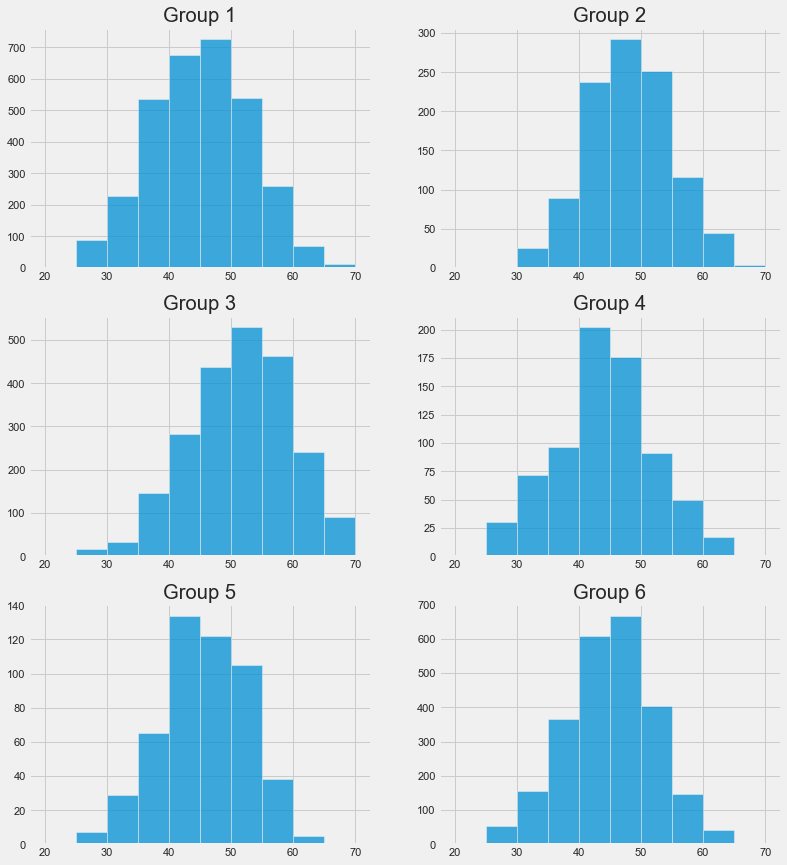

In [56]:
fig, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))
sns.histplot(df[df['cluster'] == 0]['Customer_Age'], ax=axs[0,0], binrange=(20,70), binwidth=5).set(title='Group 1', ylabel='', xlabel='')
sns.histplot(df[df['cluster'] == 1]['Customer_Age'], ax=axs[0,1], binrange=(20,70), binwidth=5).set(title='Group 2', ylabel='', xlabel='')
sns.histplot(df[df['cluster'] == 2]['Customer_Age'], ax=axs[1,0], binrange=(20,70), binwidth=5).set(title='Group 3', ylabel='', xlabel='')
sns.histplot(df[df['cluster'] == 3]['Customer_Age'], ax=axs[1,1], binrange=(20,70), binwidth=5).set(title='Group 4', ylabel='', xlabel='')
sns.histplot(df[df['cluster'] == 4]['Customer_Age'], ax=axs[2,0], binrange=(20,70), binwidth=5).set(title='Group 5', ylabel='', xlabel='')
sns.histplot(df[df['cluster'] == 5]['Customer_Age'], ax=axs[2,1], binrange=(20,70), binwidth=5).set(title='Group 6', ylabel='', xlabel='')

#### Gender: 1 for female (pink), 0 for male (green)

<AxesSubplot:title={'center':'Group 6'}>

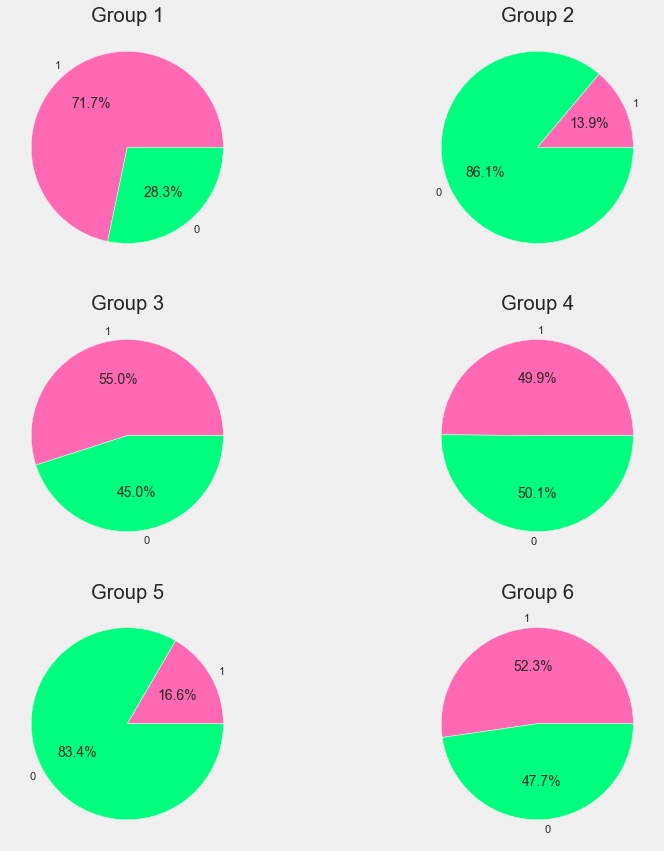

In [59]:
fig, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))
colors = ['#FF69B4', '#00FF7F']
df[df['cluster'] == 0]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0,0], ylabel='', title='Group 1', autopct='%.1f%%', colors=colors)
df[df['cluster'] == 1]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0,1], ylabel='', title='Group 2', autopct='%.1f%%', colors=colors)
df[df['cluster'] == 2]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1,0], ylabel='', title='Group 3', autopct='%.1f%%', colors=colors)
df[df['cluster'] == 3]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1,1], ylabel='', title='Group 4', autopct='%.1f%%', colors=colors)
df[df['cluster'] == 4]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2,0], ylabel='', title='Group 5', autopct='%.1f%%', colors=colors)
df[df['cluster'] == 5]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2,1], ylabel='', title='Group 6', autopct='%.1f%%', colors=colors)

#### Education

<AxesSubplot:title={'center':'Group 6'}>

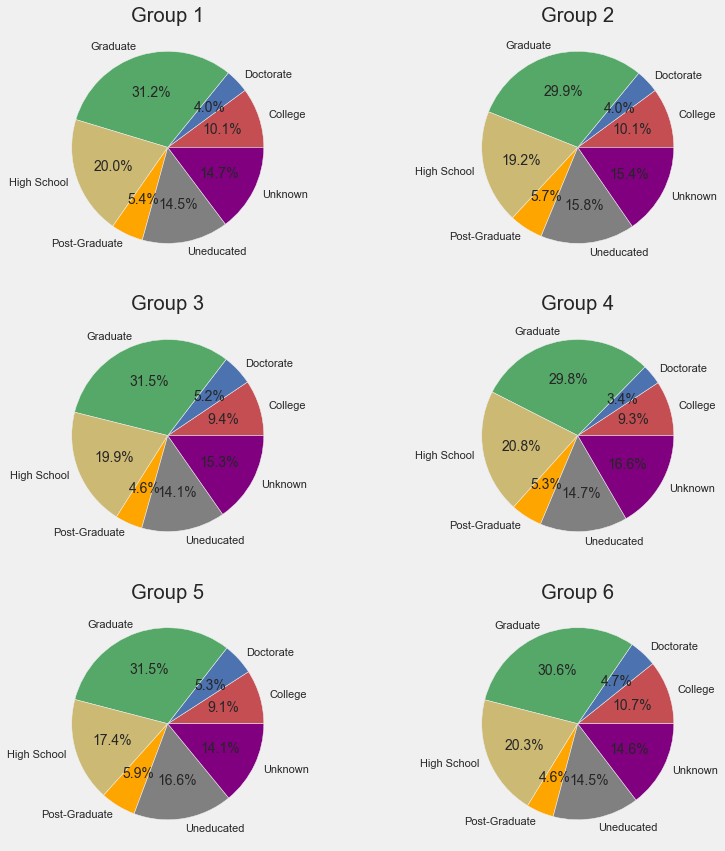

In [60]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))
df[df['cluster'] == 0]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[0,0], ylabel='', title='Group 1', colors=['r','b','g','y','orange', 'gray','purple'], autopct='%.1f%%')
df[df['cluster'] == 1]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[0,1], ylabel='', title='Group 2', colors=['r','b','g','y','orange', 'gray','purple'], autopct='%.1f%%')
df[df['cluster'] == 2]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[1,0], ylabel='', title='Group 3', colors=['r','b','g','y','orange', 'gray','purple'], autopct='%.1f%%')
df[df['cluster'] == 3]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[1,1], ylabel='', title='Group 4', colors=['r','b','g','y','orange', 'gray','purple'], autopct='%.1f%%')
df[df['cluster'] == 4]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[2,0], ylabel='', title='Group 5', colors=['r','b','g','y','orange', 'gray','purple'], autopct='%.1f%%')
df[df['cluster'] == 5]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[2,1], ylabel='', title='Group 6', colors=['r','b','g','y','orange', 'gray','purple'], autopct='%.1f%%')

#### Marital Status

<AxesSubplot:title={'center':'Group 6'}>

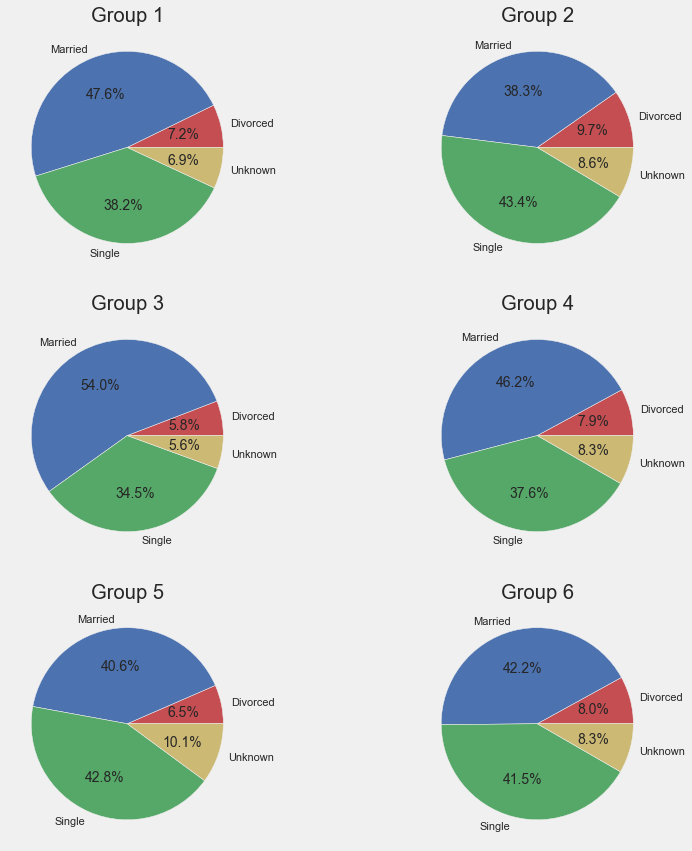

In [61]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))
df[df['cluster'] == 0]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[0,0], ylabel='', title='Group 1', colors=['r','b','g','y'], autopct='%.1f%%')
df[df['cluster'] == 1]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[0,1], ylabel='', title='Group 2', colors=['r','b','g','y'], autopct='%.1f%%')
df[df['cluster'] == 2]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[1,0], ylabel='', title='Group 3', colors=['r','b','g','y'], autopct='%.1f%%')
df[df['cluster'] == 3]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[1,1], ylabel='', title='Group 4', colors=['r','b','g','y'], autopct='%.1f%%')
df[df['cluster'] == 4]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[2,0], ylabel='', title='Group 5', colors=['r','b','g','y'], autopct='%.1f%%')
df[df['cluster'] == 5]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[2,1], ylabel='', title='Group 6', colors=['r','b','g','y'], autopct='%.1f%%')

#### Income

<AxesSubplot:title={'center':'Group 6'}>

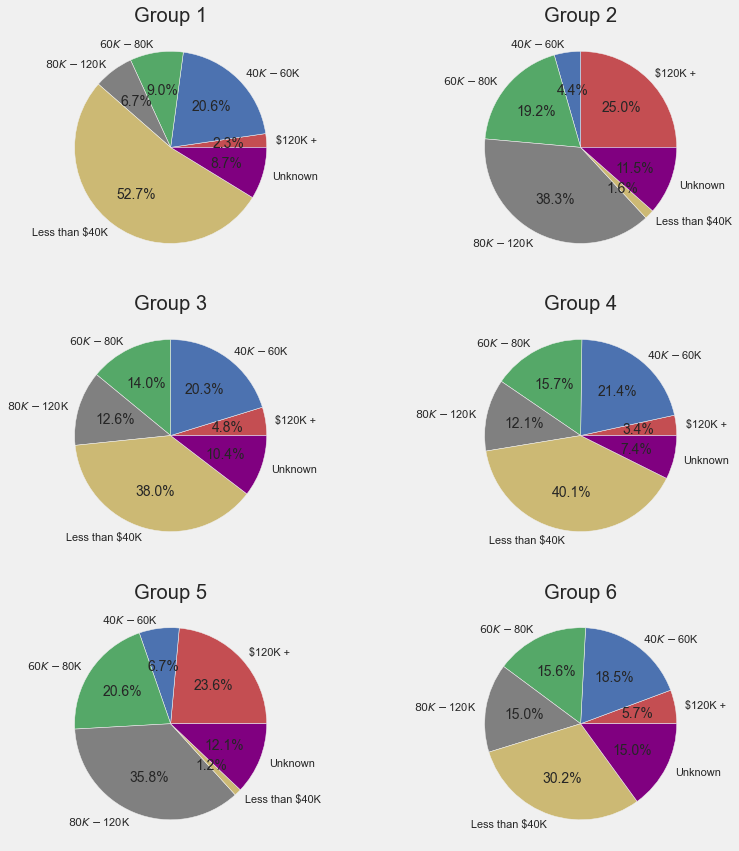

In [63]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))
df[df['cluster'] == 0]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[0,0], ylabel='', title='Group 1', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')
df[df['cluster'] == 1]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[0,1], ylabel='', title='Group 2', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')
df[df['cluster'] == 2]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[1,0], ylabel='', title='Group 3', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')
df[df['cluster'] == 3]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[1,1], ylabel='', title='Group 4', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')
df[df['cluster'] == 4]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[2,0], ylabel='', title='Group 5', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')
df[df['cluster'] == 5]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[2,1], ylabel='', title='Group 6', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')

#### Type of Card

<AxesSubplot:title={'center':'Group 6'}>

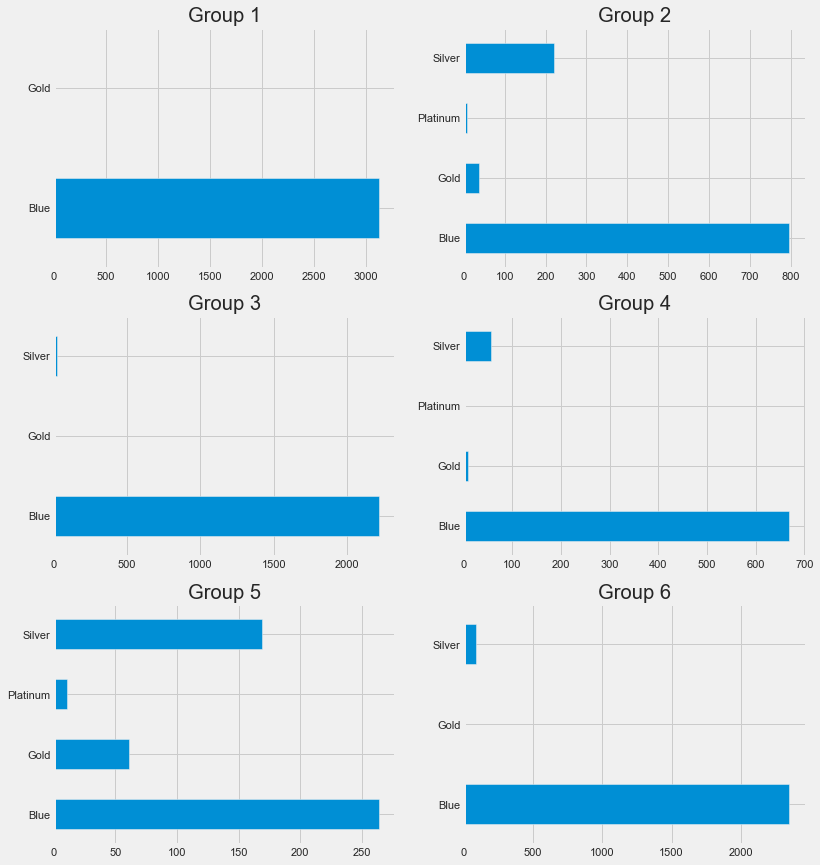

In [64]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

df[df['cluster'] == 0]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[0,0], ylabel='', title='Group 1')
df[df['cluster'] == 1]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[0,1], ylabel='', title='Group 2')
df[df['cluster'] == 2]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[1,0], ylabel='', title='Group 3')
df[df['cluster'] == 3]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[1,1], ylabel='', title='Group 4')
df[df['cluster'] == 4]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[2,0], ylabel='', title='Group 5')
df[df['cluster'] == 5]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[2,1], ylabel='', title='Group 6')

# Alternative way: Feature Selection & Clustering

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10121 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10121 non-null  int64  
 1   Attrition_Flag            10121 non-null  int64  
 2   Customer_Age              10121 non-null  int64  
 3   Gender                    10121 non-null  int64  
 4   Dependent_count           10121 non-null  int64  
 5   Education_Level           10121 non-null  object 
 6   Marital_Status            10121 non-null  object 
 7   Income_Category           10121 non-null  object 
 8   Card_Category             10121 non-null  object 
 9   Months_on_book            10121 non-null  int64  
 10  Total_Relationship_Count  10121 non-null  int64  
 11  Months_Inactive_12_mon    10121 non-null  int64  
 12  Contacts_Count_12_mon     10121 non-null  int64  
 13  Credit_Limit              10121 non-null  float64
 14  Total_

## Feature Importance through Random Forest

In [71]:
# copy the dataframe
df_copy = df.copy()

In [72]:
# one hot encoding
categ_cols = df_copy.select_dtypes(include=object).columns

# encoding with get dummies
df_copy = pd.get_dummies(df_copy, columns=categ_cols)

# drop unknown columns to avoid multicollinearity (e.g. if we have 3 categories, we only need 2 dummy variables)
df_copy = df_copy[df_copy.columns.drop(list(df_copy.filter(regex='Unknown')))]

# drop card category blue to avoid multicollinearity (blue is the baseline)
df_copy = df_copy[df_copy.columns.drop(list(df_copy.filter(regex='Blue')))]

df_copy

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,0,3,39,5,1,3,12691.0,...,1,0,0,0,1,0,0,0,0,0
2,713982108,0,51,0,3,36,4,1,0,3418.0,...,1,0,0,0,0,1,0,0,0,0
3,769911858,0,40,1,4,34,3,4,1,3313.0,...,0,0,0,0,0,0,1,0,0,0
4,709106358,0,40,0,3,21,5,1,0,4716.0,...,1,0,0,0,1,0,0,0,0,0
5,713061558,0,44,0,2,36,3,1,2,4010.0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,0,2,40,3,2,3,4003.0,...,0,1,0,1,0,0,0,0,0,0
10123,710638233,1,41,0,2,25,4,2,3,4277.0,...,0,0,0,1,0,0,0,0,0,0
10124,716506083,1,44,1,1,36,5,3,4,5409.0,...,1,0,0,0,0,0,1,0,0,0
10125,717406983,1,30,0,2,36,4,3,3,5281.0,...,0,0,0,1,0,0,0,0,0,0


In [76]:
# split the data into features and target variables
X = df_copy.drop(['CLIENTNUM','Attrition_Flag','cluster'], axis=1)
y = df_copy['Attrition_Flag']

# train a Random Forest classifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

# use the trained classifier to perform feature selection
sfm = SelectFromModel(clf, threshold=0.01)
sfm.fit_transform(X, y)

# the selected features can be accessed using the get_support method of the SelectFromModel object
selected_features = X.columns[sfm.get_support()]
selected_features

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

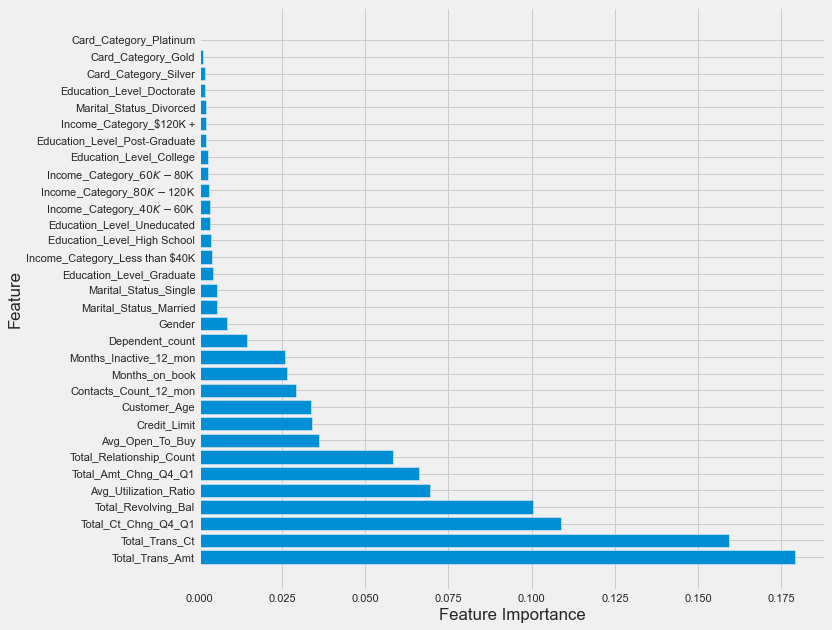

In [81]:
# Get the feature importances
importances = clf.feature_importances_

# Create a list of feature names
feature_names = X.columns

# Sort the feature importances in descending order
sorted_idx = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 10))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

Given the feature importance above, we would keep only top 7 variables to run clustering analysis

In [107]:
df_featureSelected = df[['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1',
         'Total_Amt_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Relationship_Count']]

In [108]:
df_featureSelected

,Total_Trans_Amt,Total_Trans_Ct,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Relationship_Count
0,1144,42,777,1.625,1.335,0.061,5
2,1887,20,0,2.333,2.594,0.000,4
3,1171,20,2517,2.333,1.405,0.760,3
4,816,28,0,2.500,2.175,0.000,5
5,1088,24,1247,0.846,1.376,0.311,3
...,...,...,...,...,...,...,...
10122,15476,117,1851,0.857,0.703,0.462,3
10123,8764,69,2186,0.683,0.804,0.511,4
10124,10291,60,0,0.818,0.819,0.000,5
10125,8395,62,0,0.722,0.535,0.000,4


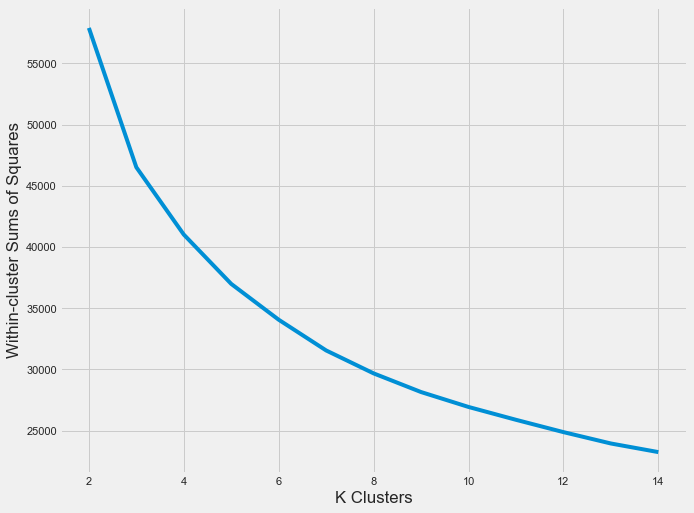

In [109]:
# elbow method to find the optimal number of clusters
a = []
data = StandardScaler().fit_transform(df_featureSelected)

for i in range(2,15):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 1)
    km.fit(data)
    a.append(km.inertia_)

fig = plt.figure(figsize=(10,8))
plt.plot(range(2,15), a)
plt.xlabel('K Clusters')
plt.ylabel('Within-cluster Sums of Squares')
plt.show()

In [101]:
# get silhouette score for k= 2,3,4,5,6,7,8,9,10
for i in range(2,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 50, random_state = 1)
    km.fit(data)
    print('Silhouette Score for k =', i, 'is', silhouette_score(data, km.labels_))

Silhouette Score for k = 2 is 0.23520516847696482
Silhouette Score for k = 3 is 0.22082305504331518
Silhouette Score for k = 4 is 0.22743174739510022
Silhouette Score for k = 5 is 0.20502708346490164
Silhouette Score for k = 6 is 0.19539960194493172
Silhouette Score for k = 7 is 0.19442823566662604
Silhouette Score for k = 8 is 0.18710883629732894
Silhouette Score for k = 9 is 0.19318970492240495
Silhouette Score for k = 10 is 0.1836182307186138


Unfortunately, the Silhouette Score of < 0.25 means scant evidence of cluster reality. Therefore, we will only select the clustering result from PCA dataset. 